## 랜덤포레스트
 * - **[유튜브 김성범 교수님 강의](https://www.youtube.com/@user-yu5qs4ct2b) , [전북대학교 최규빈 교수님 강의노트](https://guebin.github.io/MP2023/)로 학습한 것을 토대로 작성하였습니다.**

### 의사결정나무(개별 트리)의 단점

 * 계층적 구조로 인해 중간에 에러가 발생하면 다음 단계에도 에러가 계속 전파됩니다.
 * 학습 데이터의 미세한 변동에도 최종 결과에 크게 영향을 끼칠 수 있습니다.
 * 적은 개수의 노이즈에도 크게 영향을 받습니다.
 * 나무의 최종노드 개수를 늘리면 과적합(Overfitting) 위험이 발생합니다. \
 $\rightarrow$ **해결방법** : `랜덤포레스트`

### 랜덤포레스트란?
* 여러 Base모델(`의사결정나무`)들의 예측을 다수결법칙 or 평균을 이용해 통합하여 예측 정확성을 향상시키는 모델
* 랜덤포레스트 구조를 시각화하면 다음과 같습니다.

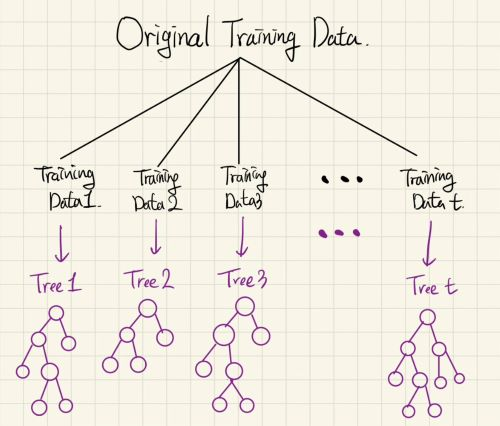

 *  여기서 Base모델은 서로 독립이고, 무작위 예측보다 성능이 좋아야한다는 전제조건이 필요합니다.
 *  랜덤포레스트의 중요한 두가지 키워드는 **Diversity**와 **Random subspace**입니다.

### Diversity

 *  여러 Training data를 생성하여 각 데이터마다 개별 의사결정나무 모델로 구축
 *  그럼 개별 의사결정나무에 어떻게 데이터를 할당해주지? $\rightarrow$ **Bagging** 이용

#### Bagging(**B**ootstrap **Agg**regat**ing**)

 * 각 모델은 서로 다른 학습 데이터 셋을 이용합니다.
 * 각 모델에 쓰이는 데이터는 원본데이터의 [복원추출](https://terms.naver.com/entry.naver?docId=3405112&cid=47324&categoryId=47324)로 생성됩니다.
 * 각 데이터 셋은 원본 데이터의 개수만큼 복원추출을 시행합니다.\
$\rightarrow$ 원본 데이터의 개수가 n개라면 n번의 복원추출 시행
 * 위에 랜덤포레스트 구조를 시각화한 것이 이제는 이해가 가시나요?

#### Random subspace

* 각 개별 트리가 노드를 뻗어나갈 때 필요한 변수는 무작위로 선택됩니다.

### Voting

 * 학습된 각각의 의사결정나무들로 어떻게 결과를 도출할까요? $\rightarrow$ **Voting**이용
 * 다음 소개되는 Voting 방법들의 예시는 모두 `Classification`입니다.

----------------------------------------

#### 1. `Majority Voting`


$Ensemble(\hat{y}) = \underset{i}\arg\max \left(\displaystyle\sum_{i=1}^{n}I(\hat{y} \in i), i \in \left\{0,1\right\} \right)$ \
**EX)** $\displaystyle\sum_{i=1}^{n}I(\hat{y} \in 0)=4$ , $\displaystyle\sum_{i=1}^{n}I(\hat{y} \in 1)=6 \;\Rightarrow\; Ensemble(\hat{y})=1$

 - 1이라고 예측한 모델이 6개, 0이라고 예측한 모델이 4개 즉, 다수결 투표로 1이 예측값이 되었습니다.(Hard Voting)

------------------------

#### 2. `Weighted Voting(weight = training accuracy of individual models)`


$Ensemble(\hat{y}) = \underset{i}\arg\max \Bigg(\displaystyle\frac{\sum_{j=1}^{n}(TrainAcc_{j})I(\hat{y}=1)}{\sum_{j=1}^{n}(TrainAcc_{j})}, i \in \left\{0,1 \right\}\Bigg)$ \
\
**EX)** $\displaystyle\frac{\sum_{j=1}^{n}(TrainAcc_{j})I(\hat{y}=0)}{\sum_{j=1}^{n}(TrainAcc_{j})} = 0.4$ , $\displaystyle\frac{\sum_{j=1}^{n}(TrainAcc_{j})I(\hat{y}=1)}{\sum_{j=1}^{n}(TrainAcc_{j})} = 0.6$  \
\
$\Rightarrow\; Ensemble(\hat{y}) = 1$ 
 * 각 모델의 Accuracy를 바탕으로 가중치가 부여됩니다. 높은 Accuracy를 가진 모델은 더 많은 가중치를 갖게 됩니다.(가중치 평균을 이용한 Voting)

--------------------------------

#### 3. `Weighted Voting (weight = predicted probability for each class)`

$Ensemble(\hat{y}) = \underset{i}\arg\max\big(\displaystyle\frac1n \sum_{j=1}^{n}P(\hat{y}=i), i \in \left\{0,1 \right\}\big)$ \
\
**EX)** $\displaystyle\frac1n \sum_{j=1}^{n}P(\hat{y}=0)=0.3$ , $\displaystyle\frac1n \sum_{j=1}^{n}P(\hat{y}=1)=0.7 \;\Rightarrow\; Ensemble(\hat{y}) = 1$ 

 * 각 모델들이 예측할 확률들의 평균을 구한 후에, 다수결을 이용하여 최조 선택하는 방식입니다.
 * 0이 나올 확률들의 평균값은 0.3 , 1이 나올 확률들의 평균값은 0.7이므로 1이 예측값이 되었습니다.(Soft Voting)

------------------------------

 * 실제로 Voting은 랜덤포레스트에서만 사용되는 앙상블 기법은 아닙니다. 랜덤포레스트에서 Voting은 동일한 모델(의사결정나무)들에서 Voting을 하는 반면에, 좀 더 일반적인 Voting은 다양한 모델에서 투표를 하는 방식으로 이루어집니다.

### 코드 구현

(추후 업로드 예정)